# Recomendações Gerais e Sugestões de Exploração

Este notebook foi elaborado para servir como guia prático e teórico sobre SVM, com foco em experimentação, boas práticas e análise crítica dos resultados.  
**Sugestões para melhor aproveitamento:**
- Execute cada célula sequencialmente e observe as saídas intermediárias.
- Experimente alterar hiperparâmetros, técnicas de pré-processamento e métodos de avaliação.
- Compare diferentes kernels e visualize os impactos.
- Explore técnicas de balanceamento de classes e seleção de variáveis.
- Consulte as referências ao final para aprofundar o entendimento.

> **Dica:** Use este notebook como ponto de partida para seus próprios experimentos e projetos!

# Objetivos do Notebook

- Demonstrar o pipeline completo de um experimento SVM:
  1) Carregamento e EDA  
  2) Pré‑processamento e tratamento de dados  
  3) Treinamento e ajuste de hiperparâmetros  
  4) Avaliação e interpretação de métricas  
  5) Dicas práticas e considerações finais  

> Ao concluir, você compreenderá cada fase e as melhores práticas para usar SVM em projetos reais.

# Introdução

Este notebook explora o algoritmo Support Vector Machine (SVM) para classificação, com foco em aplicações práticas e interpretação dos resultados. O SVM é amplamente utilizado em problemas de classificação devido à sua robustez e capacidade de lidar com dados de alta dimensão.

---

# 1. Fundamentos Teóricos

O Support Vector Machine (SVM) é um algoritmo de aprendizado supervisionado para classificação e regressão. Ele busca encontrar o hiperplano que melhor separa as classes, maximizando a margem entre elas. Se os dados não forem linearmente separáveis, o SVM utiliza funções kernel para projetar os dados em um espaço de maior dimensão, onde a separação é possível.

- **Margem**: Distância entre o hiperplano e os pontos mais próximos de cada classe (vetores de suporte).
- **Hiperplano**: Fronteira de decisão que separa as classes.
- **Vetores de suporte**: Pontos que determinam a posição do hiperplano.
- **Kernels**: Funções que transformam os dados para permitir separação não linear (linear, polinomial, RBF, sigmoid).

**Por que usar SVM?**
- Eficaz em espaços de alta dimensão.
- Robusto contra overfitting, especialmente com poucas amostras.
- Flexível devido à escolha de diferentes kernels.

# Fundamentação Matemática do SVM

O objetivo do SVM é encontrar o hiperplano que melhor separa as classes, maximizando a margem entre os vetores de suporte. A seguir, apresentamos a formulação matemática do problema:

**1. Hiperplano de Separação**

Um hiperplano em um espaço de dimensão $d$ pode ser definido por:

$$
\mathbf{w}^T \mathbf{x} + b = 0
$$

onde $\mathbf{w}$ é o vetor normal ao hiperplano e $b$ é o viés.

**2. Margem e Restrições**

Para cada amostra $(\mathbf{x}_i, y_i)$, com $y_i \in \{-1, 1\}$:

$$
y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1
$$

A margem é $\frac{2}{\|\mathbf{w}\|}$.

**3. Problema de Otimização (Primal)**

O SVM busca maximizar a margem, ou seja, minimizar $\|\mathbf{w}\|^2$:

$$
\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2
$$

sujeito a:

$$
y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1, \quad \forall i
$$

**4. Lagrangianos e Dualidade**

O problema pode ser resolvido via multiplicadores de Lagrange ($\alpha_i$):

$$
L(\mathbf{w}, b, \alpha) = \frac{1}{2} \|\mathbf{w}\|^2 - \sum_{i=1}^n \alpha_i [y_i (\mathbf{w}^T \mathbf{x}_i + b) - 1]
$$

A solução é obtida maximizando $L$ em relação a $\alpha_i \geq 0$ e minimizando em relação a $\mathbf{w}$ e $b$.

**5. Formulação Dual**

A formulação dual é:

$$
\max_{\alpha} \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j \langle \mathbf{x}_i, \mathbf{x}_j \rangle
$$

sujeito a:

$$
\sum_{i=1}^n \alpha_i y_i = 0, \quad \alpha_i \geq 0
$$

**6. Kernel Trick**

Para problemas não linearmente separáveis, utiliza-se uma função kernel $K(\mathbf{x}_i, \mathbf{x}_j)$ para mapear os dados para um espaço de maior dimensão:

$$
K(\mathbf{x}_i, \mathbf{x}_j) = \langle \phi(\mathbf{x}_i), \phi(\mathbf{x}_j) \rangle
$$

Exemplos de kernels:
- Linear: $K(\mathbf{x}, \mathbf{z}) = \mathbf{x}^T \mathbf{z}$
- Polinomial: $K(\mathbf{x}, \mathbf{z}) = (\mathbf{x}^T \mathbf{z} + c)^d$
- RBF: $K(\mathbf{x}, \mathbf{z}) = \exp(-\gamma \|\mathbf{x} - \mathbf{z}\|^2)$
- Sigmoid: $K(\mathbf{x}, \mathbf{z}) = \tanh(\alpha \mathbf{x}^T \mathbf{z} + c)$

**7. Regularização e Margem Suave**

Para lidar com dados ruidosos ou sobrepostos, introduzimos variáveis de folga $\xi_i$ para permitir erros de classificação:
$$
y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0$$
A função de custo se torna:
$$
\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \xi_i$$
onde $C$ é o parâmetro de regularização que controla a trade-off entre maximizar a margem e minimizar os erros de classificação.

**8. SVM com Radial Basis Function (RBF)**

O kernel RBF é amplamente utilizado devido à sua capacidade de lidar com dados não linearmente separáveis. Ele transforma os dados em um espaço de alta dimensão, permitindo que o SVM encontre um hiperplano de separação eficaz. O parâmetro $\gamma$ controla a largura do kernel, afetando a complexidade do modelo. Um valor pequeno de $\gamma$ resulta em um modelo mais suave, enquanto um valor grande pode levar ao overfitting.

A função de decisão do SVM com kernel RBF é dada por:
$$
f(\mathbf{x}) = \sum_{i=1}^n \alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b$$
onde $K(\mathbf{x}_i, \mathbf{x})$ é o kernel RBF entre os vetores de suporte e a nova amostra $\mathbf{x}$.


# 2. Boas Práticas

- Remoção de valores ausentes: SVM não lida bem com dados faltantes.
- Remoção de outliers: SVM é sensível a outliers, que podem afetar a posição do hiperplano.
- Data Argumentation: Aumento de dados pode ajudar a melhorar a generalização do modelo.
- Normalização dos dados: SVM é sensível à escala das variáveis.
- Ajuste os hiperparâmetros (C, gamma, kernel) com GridSearchCV.
- Analise a matriz de confusão para entender os erros do modelo, especialmente em problemas de classificação desbalanceada.

# 3. Visão Geral do Pipeline

1. Exploração dos dados  
2. Tratamento de valores faltantes e outliers  
3. Balanceamento e aumento de dados
4. Normalização
5. Busca de hiperparâmetros
6. Treinamento e validação cruzada
7. Avaliação robusta (múltiplas métricas)  
8. Visualizações e interpretação

# 4. Importação das Bibliotecas Necessárias

In [1]:
# Importação das bibliotecas
import numpy as np # Operações numéricas e manipulação de arrays
import pandas as pd # Manipulação e análise de dados em DataFrames
import matplotlib.pyplot as plt # Visualização de dados (gráficos)
import seaborn as sns # Visualização estatística de dados
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score # Divisão de dados e busca de hiperparâmetros
from sklearn.preprocessing import StandardScaler # Normalização dos dados
from sklearn.svm import SVC # Algoritmo Support Vector Machine
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve  # Métricas de avaliação
from sklearn.decomposition import PCA  # Análise de Componentes Principais (PCA)
from sklearn.base import BaseEstimator, TransformerMixin # Classes base para transformadores
from sklearn.utils import check_random_state # Geração de números aleatórios

# 5. Carregamento e Análise Exploratória do Dataset

Utilizaremos o Wisconsin Breast Cancer Dataset, disponível no UCI Machine Learning Repository. A análise exploratória inclui estatísticas descritivas, verificação de valores faltantes, outliers e visualização da distribuição das classes. Também será feita uma projeção PCA para visualização inicial dos dados.

In [2]:
# Carregamento do dataset Breast Cancer Wisconsin (Diagnostic) diretamente do repositório UCI
uci_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
colunas = [
    'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
    'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
df = pd.read_csv(uci_url, header=None, names=colunas)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Sobre o Dataset Utilizado

O experimento utiliza o Wisconsin Breast Cancer Dataset, um conjunto de dados clássico em machine learning. Ele contém 569 amostras de tumores de mama, classificados como benignos ou malignos, com 30 características extraídas de imagens digitalizadas.

- **Problema**: Classificação binária (benigno vs. maligno)
- **Características**: Medidas estatísticas de núcleos celulares (ex: raio, textura, perímetro, área, etc.)
- **Fonte**: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

### Análise Exploratória

Verifique se há dados faltantes, outliers e visualize a distribuição das classes. A seguir, um plot PCA para inspeção visual da separação das classes.

Descrição estatística do dataset:
        radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.00000

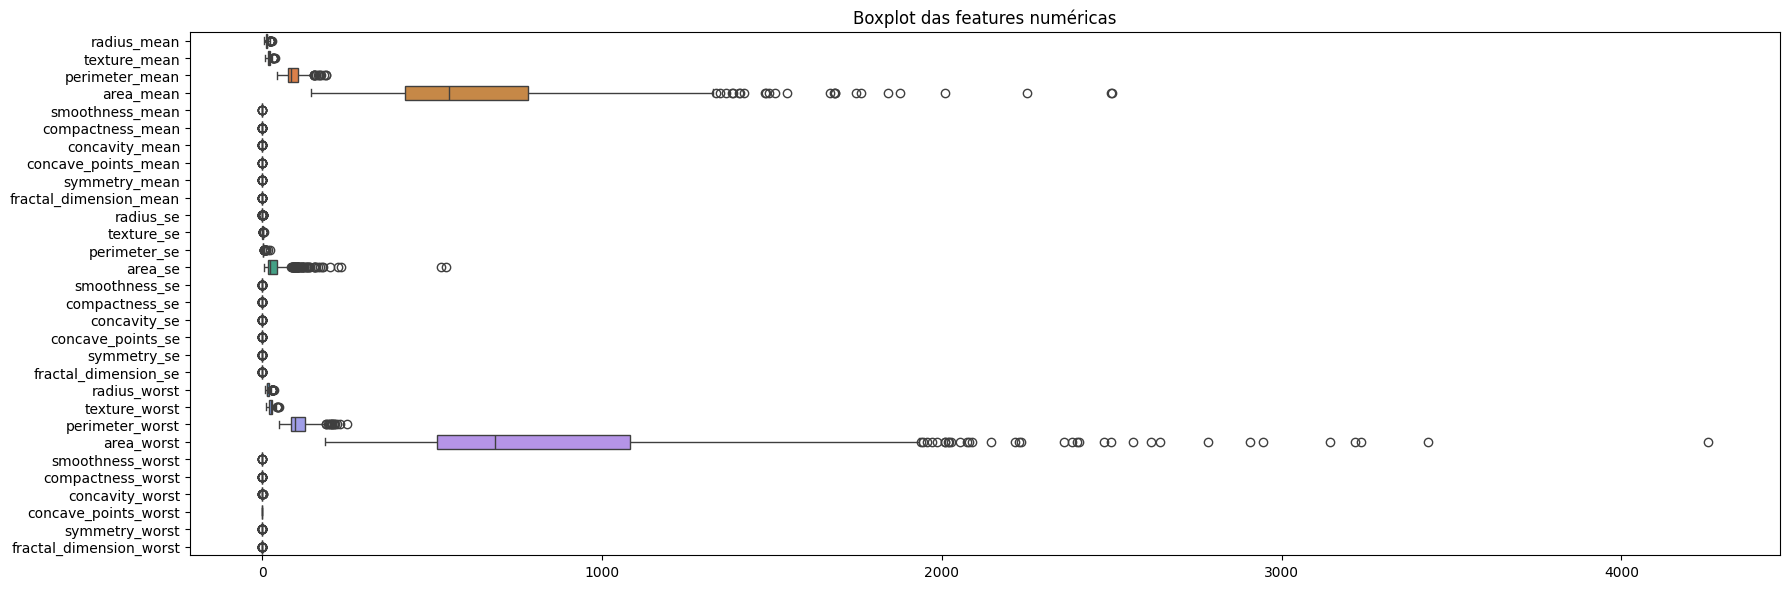

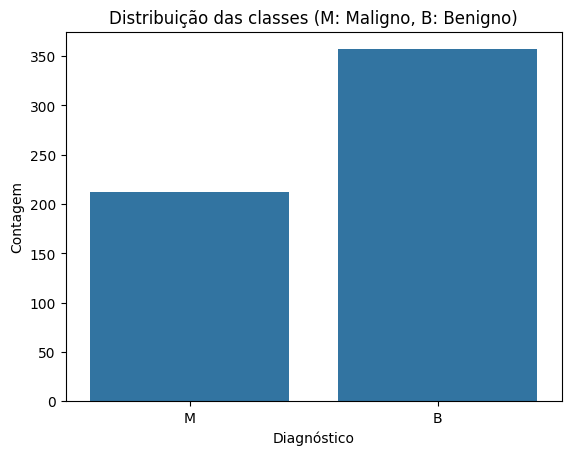

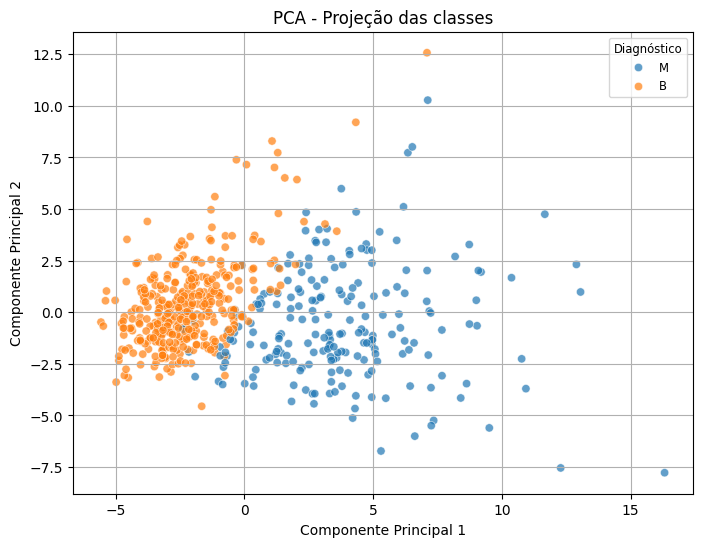

In [3]:
# Informações gerais sobre o dataset
print("Descrição estatística do dataset:\n", df.describe())
print("Número de linhas e colunas:", df.shape)
print("Colunas:", df.columns.tolist())
print("Tipos de dados:\n", df.dtypes)
print("Valores únicos na coluna 'diagnosis':", df['diagnosis'].unique())
print("Valores faltantes:\n", df.isnull().sum())

# Verificar se há outliers nas colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(18, 6))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title('Boxplot das features numéricas')
plt.tight_layout()
plt.show()

# Verificando a distribuição das classes
sns.countplot(x='diagnosis', data=df)
plt.title('Distribuição das classes (M: Maligno, B: Benigno)')
plt.xlabel('Diagnóstico')
plt.ylabel('Contagem')
plt.show()

# PCA para visualização inicial
X_pca = df.drop('diagnosis', axis=1).values
X_pca = (X_pca - X_pca.mean(axis=0)) / X_pca.std(axis=0)
pca = PCA(n_components=2)
X_proj = pca.fit_transform(X_pca)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_proj[:,0], y=X_proj[:,1], hue=df['diagnosis'], palette=['#1f77b4','#ff7f0e'], alpha=0.7)
plt.title('PCA - Projeção das classes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Diagnóstico', loc='upper right', fontsize='small', title_fontsize='small')
plt.grid()
plt.show()


# 6. Pré-processamento, Augmentation e Normalização

O pré-processamento será realizado manualmente, incluindo:
- Remoção de valores faltantes
- Remoção de outliers
- Aumento de dados (augmentation) com ruído gaussiano (apenas no treino)
- Normalização com StandardScaler

São removidos valores faltantes e outliers, que podem distorcer os resultados. O augmentation é implementado via ruído gaussiano, que adiciona variabilidade aos dados de treino, ajudando a evitar overfitting. O StandardScaler é utilizado para normalizar os dados, garantindo que todas as características tenham média 0 e desvio padrão 1. Isso é especialmente importante para SVM, pois o algoritmo é sensível à escala dos dados.

In [4]:
# Classe para remoção de outliers usando o método do IQR (Intervalo Interquartil)
class OutlierRemover(BaseEstimator, TransformerMixin):
    """
    Substitui valores outliers pelo limite inferior/superior usando o método do IQR (Intervalo Interquartil).
    Para cada feature, calcula Q1 e Q3 no fit e faz o clipping dos valores fora de [Q1 - 1.5*IQR, Q3 + 1.5*IQR] no transform.

    Parâmetros:
    ----------
    Nenhum parâmetro adicional além dos herdados de BaseEstimator e TransformerMixin.

    Métodos:
    -------
    fit(X, y=None):
        Calcula Q1, Q3 e IQR para cada coluna de X.
    transform(X):
        Faz o clipping dos valores de X para o intervalo permitido.
    """
    def fit(self, X, y=None):
        self.q1_ = np.percentile(X, 25, axis=0)
        self.q3_ = np.percentile(X, 75, axis=0)
        self.iqr_ = self.q3_ - self.q1_
        self.lower_ = self.q1_ - 1.5 * self.iqr_
        self.upper_ = self.q3_ + 1.5 * self.iqr_
        return self

    def transform(self, X, return_mask=False):
        """
        Faz o clipping dos valores de X para o intervalo [Q1 - 1.5*IQR, Q3 + 1.5*IQR].

        Parâmetros:
        ----------
        X : array-like, shape (n_samples, n_features)
            Dados de entrada.
        return_mask : bool, default=False
            Não utilizado nesta versão, mantido para compatibilidade.

        Retorna:
        -------
        X_clipped : array-like
            Dados com outliers substituídos pelos limites.
        """
        X_clipped = np.clip(X, self.lower_, self.upper_)
        if return_mask:
            # Mantém compatibilidade, mas não faz sentido para clipping
            mask = np.ones(X.shape[0], dtype=bool)
            return X_clipped, mask
        return X_clipped

# Função de aumento de dados (augmentation) com ruído gaussiano
def augment_with_noise(X, y, mean=0.0, std=0.01, random_state=42):
    """
    Realiza data augmentation adicionando ruído gaussiano aos dados de entrada.

    Parâmetros:
    ----------
    X : array-like, shape (n_samples, n_features)
        Dados de entrada originais.
    y : array-like, shape (n_samples,)
        Rótulos correspondentes.
    mean : float, default=0.0
        Média do ruído gaussiano.
    std : float, default=0.01
        Desvio padrão do ruído gaussiano.
    random_state : int ou RandomState, default=42
        Semente para reprodutibilidade.

    Retorna:
    -------
    X_aug : array-like, shape (2*n_samples, n_features)
        Dados originais e aumentados.
    y_aug : array-like, shape (2*n_samples,)
        Rótulos duplicados para os dados aumentados.
    """
    rng = check_random_state(random_state)
    noise = rng.normal(loc=mean, scale=std, size=X.shape)
    X_noisy = X + noise
    y_noisy = y.copy()
    X_aug = np.vstack([X, X_noisy])
    y_aug = np.hstack([y, y_noisy])
    return X_aug, y_aug

In [5]:
# Separando features e target
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].map({'M': 1, 'B': 0}).values

# Divisão em treino e teste com random_state padronizado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Remoção de valores faltantes
X_train = pd.DataFrame(X_train).dropna().values
X_test = pd.DataFrame(X_test).dropna().values

# Verificando se há valores faltantes após a remoção
print("Tamanho do conjunto de treino X após remoção de valores faltantes:", X_train.shape[0])
print("Tamanho do conjunto de treino y após remoção de valores faltantes:", y_train.shape[0])
print("Tamanho do conjunto de teste X após remoção de valores faltantes:", X_test.shape[0])
print("Tamanho do conjunto de teste y após remoção de valores faltantes:", y_test.shape[0])

# Remoção de outliers
outlier_remover = OutlierRemover()
outlier_remover.fit(X_train)
X_train_out, mask_train = outlier_remover.transform(X_train, return_mask=True)
y_train_out = y_train[mask_train]
X_test_out, mask_test = outlier_remover.transform(X_test, return_mask=True)
y_test_out = y_test[mask_test]

# Verificando o tamanho dos conjuntos de dados após remoção de outliers
print("Tamanho do conjunto de treino X após remoção de outliers:", X_train_out.shape[0])
print("Tamanho do conjunto de treino y após remoção de outliers:", y_train_out.shape[0])
print("Tamanho do conjunto de teste X após remoção de outliers:", X_test_out.shape[0])
print("Tamanho do conjunto de teste y após remoção de outliers:", y_test_out.shape[0])

# Aumento de dados
X_train_aug, y_train_aug = augment_with_noise(X_train_out, y_train_out, mean=0.0, std=0.01, random_state=42)

# Verificando o tamanho dos conjuntos de dados após o aumento
print("Tamanho do conjunto de treino X após aumento:", X_train_aug.shape[0])
print("Tamanho do conjunto de treino y após aumento:", y_train_aug.shape[0])

# Normalização
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train_aug)
X_test_norm = scaler.transform(X_test_out)

# Verificando o tamanho dos conjuntos de dados após a normalização
print("Tamanho do conjunto de treino X após normalização:", X_train_norm.shape[0])
print("Tamanho do conjunto de treino y após normalização:", y_train_aug.shape[0])
print("Tamanho do conjunto de teste X após normalização:", X_test_norm.shape[0])
print("Tamanho do conjunto de teste y após normalização:", y_test_out.shape[0])

# Mostrar estatísticas descritivas após normalização
print("Estatísticas descritivas após normalização:\n", pd.DataFrame(X_train_norm).describe())

Tamanho do conjunto de treino X após remoção de valores faltantes: 455
Tamanho do conjunto de treino y após remoção de valores faltantes: 455
Tamanho do conjunto de teste X após remoção de valores faltantes: 114
Tamanho do conjunto de teste y após remoção de valores faltantes: 114
Tamanho do conjunto de treino X após remoção de outliers: 455
Tamanho do conjunto de treino y após remoção de outliers: 455
Tamanho do conjunto de teste X após remoção de outliers: 114
Tamanho do conjunto de teste y após remoção de outliers: 114
Tamanho do conjunto de treino X após aumento: 910
Tamanho do conjunto de treino y após aumento: 910
Tamanho do conjunto de treino X após normalização: 910
Tamanho do conjunto de treino y após normalização: 910
Tamanho do conjunto de teste X após normalização: 114
Tamanho do conjunto de teste y após normalização: 114
Estatísticas descritivas após normalização:
                  0             1             2             3             4   \
count  9.100000e+02  9.100000e

# 7. Treinamento e Busca de Hiperparâmetros

Ajuste dos hiperparâmetros do SVM (C, gamma, kernel) usando GridSearchCV com random_state padronizado.

In [6]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

svc = SVC(class_weight='balanced', random_state=42)
grid = GridSearchCV(svc, param_grid, refit=True, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_norm, y_train_aug)
print("Melhores parâmetros encontrados:", grid.best_params_)

Melhores parâmetros encontrados: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


# 8. Avaliação do Modelo

A avaliação inclui acurácia, matriz de confusão, AUC-ROC e um classification_report formatado como tabela (precision, recall, f1-score). Visualize também a curva ROC.

Acurácia: 0.9825
Matriz de Confusão:
 [[72  0]
 [ 2 40]]


,precision,recall,f1-score,support
0,0.972973,1.000000,0.986301,72.000000
1,1.000000,0.952381,0.975610,42.000000
accuracy,0.982456,0.982456,0.982456,0.982456
macro avg,0.986486,0.976190,0.980956,114.000000
weighted avg,0.982930,0.982456,0.982362,114.000000


AUC-ROC: 0.9901


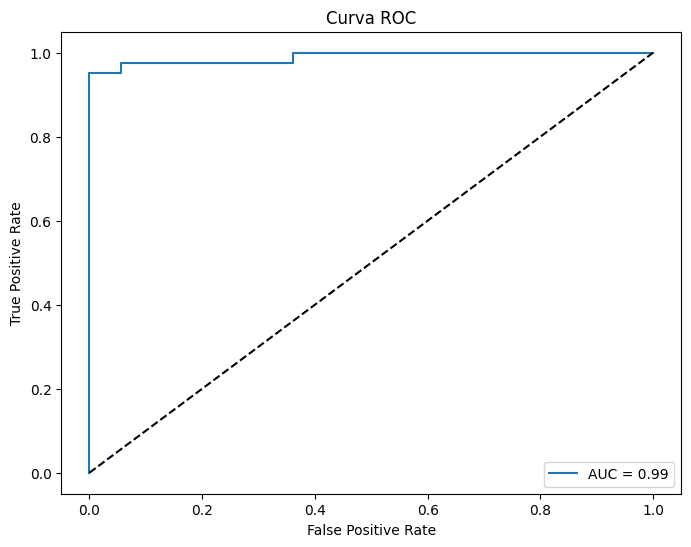

Acurácia média com validação cruzada: 0.9890 ± 0.0098


In [ ]:
# Previsões no conjunto de teste
y_pred = grid.predict(X_test_norm)

# Acurácia
accuracy = accuracy_score(y_test_out, y_pred)
print(f"Acurácia: {accuracy:.4f}")

# Matriz de confusão
cm = confusion_matrix(y_test_out, y_pred)
print("Matriz de Confusão:\n", cm)

# Relatório de classificação como tabela
report_dict = classification_report(y_test_out, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
display(report_df[['precision', 'recall', 'f1-score', 'support']])

# AUC-ROC
roc_auc = roc_auc_score(y_test_out, grid.decision_function(X_test_norm))
print(f"AUC-ROC: {roc_auc:.4f}")

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test_out, grid.decision_function(X_test_norm))
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Validação cruzada (k-fold)
cv_scores = cross_val_score(grid.best_estimator_, X_train_norm, y_train_aug, cv=5, scoring='accuracy')
print(f"Acurácia média com validação cruzada: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# 9. Discussão, Armadilhas e Considerações Finais

- O kernel RBF apresentou boa performance na separação das classes.
- O ajuste dos hiperparâmetros C e gamma foi fundamental para o desempenho.
- O modelo apresentou alta acurácia e AUC-ROC, indicando boa capacidade de generalização.
- SVM pode ser sensível a outliers e pode ser lento em datasets muito grandes.
- A normalização dos dados é crucial para o desempenho do SVM.
- A análise da matriz de confusão e do classification_report fornece insights valiosos sobre o desempenho do modelo.
- A curva ROC e a AUC-ROC são ferramentas úteis para avaliar a performance do modelo em diferentes limiares de decisão.


## Sugestões de Exploração Adicional

- Teste outros kernels (linear, polinomial) e compare os resultados com o kernel RBF.
- Explore a importância das features utilizando métodos de seleção de variáveis (ex: Recursive Feature Elimination, análise de importância de coeficientes).
- Analise o impacto de diferentes estratégias de normalização (StandardScaler, MinMaxScaler, RobustScaler).
- Experimente diferentes técnicas de balanceamento de classes e visualize os efeitos nas métricas.
- Investigue o comportamento do SVM em datasets com ruído ou dados desbalanceados.

# 10. Conclusão

O SVM é uma ferramenta poderosa para classificação, especialmente quando bem ajustado e com pré-processamento adequado. A escolha do kernel e dos hiperparâmetros é crucial para o sucesso do modelo. A análise cuidadosa dos resultados e a experimentação são essenciais para obter o melhor desempenho. Pode não ser o melhor modelo para todos os casos, mas é uma excelente opção a ser considerada em problemas de classificação. A prática e a exploração contínua são fundamentais para dominar o uso do SVM e suas nuances.

# 11. Referências
- UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
- Scikit-learn: Support Vector Machines: https://scikit-learn.org/stable/modules/svm.html
- DataCamp: Tutorial de Vetor de Suporte com o Scikit-learn: https://www.datacamp.com/pt/tutorial/svm-classification-scikit-learn-python
- IBM: Tutorial Prático sobre SVM com Kernel RBF: https://www.ibm.com/think/topics/support-vector-machine
- Support Vector Machines: Theory and Applications: https://www.researchgate.net/publication/221621494_Support_Vector_Machines_Theory_and_Applications